In [2]:
import lightkurve as lk 

In [35]:
sr = lk.search_targetpixelfile('K2-18', cadence='long')

In [36]:
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 01,2014,K2,1800,ktwo201912552,0.0


In [37]:
tpf = sr.download()

In [39]:
tpf.animate()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

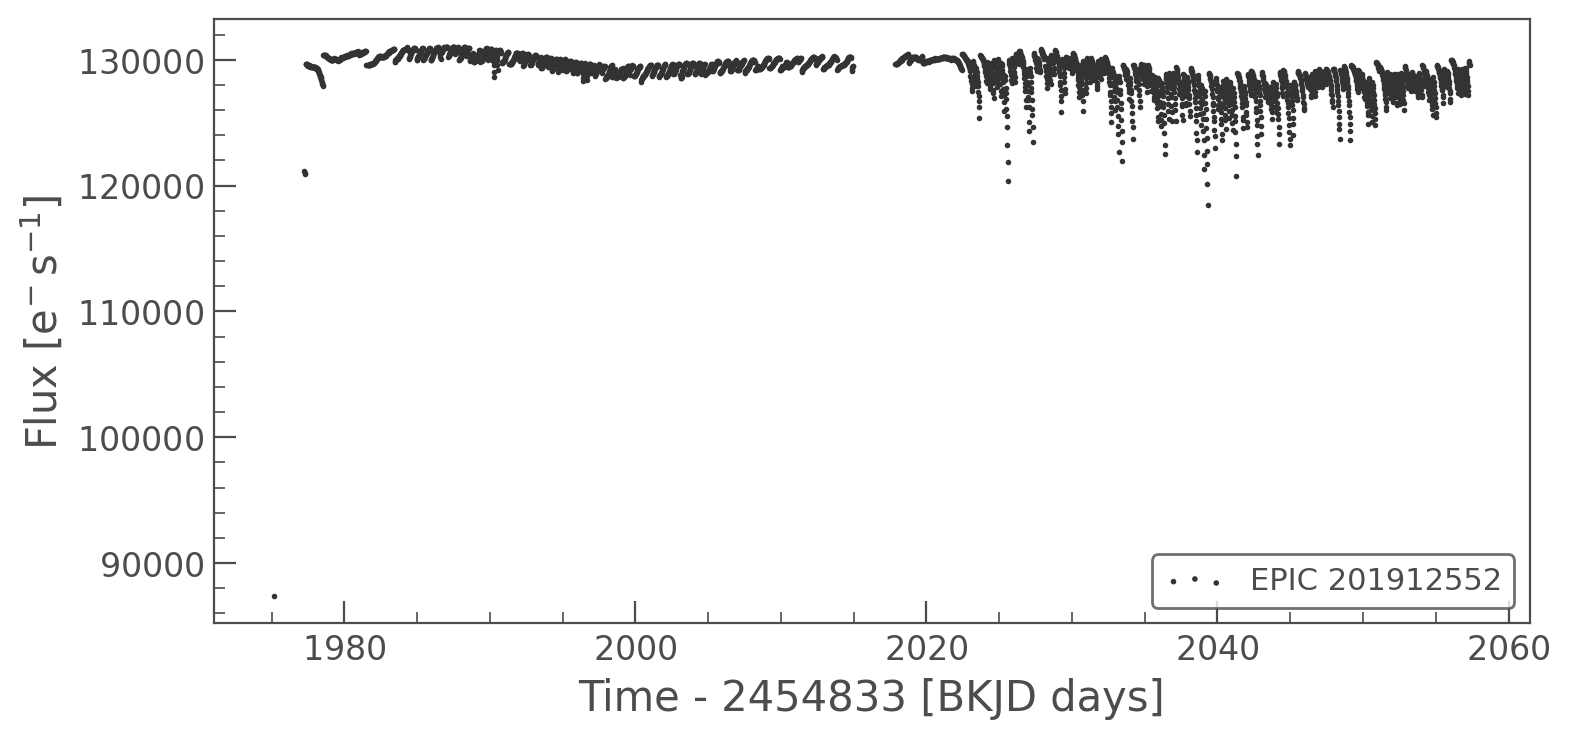

In [38]:
tpf.to_lightcurve().scatter()

In [21]:
lc = tpf.to_lightcurve().flatten()

In [22]:
bls = lc.to_periodogram('bls', minimum_period=0.5, maximum_period=4)

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

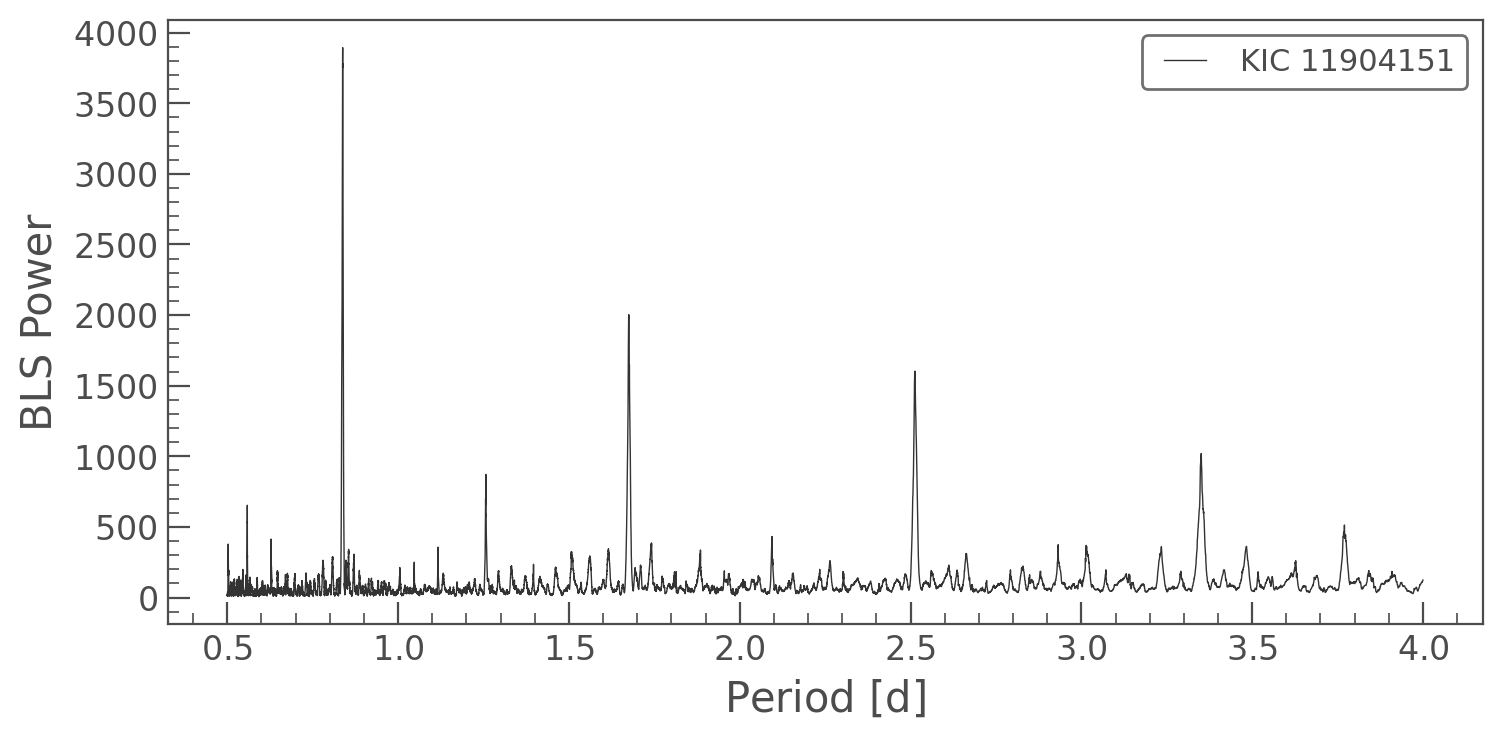

In [23]:
bls.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

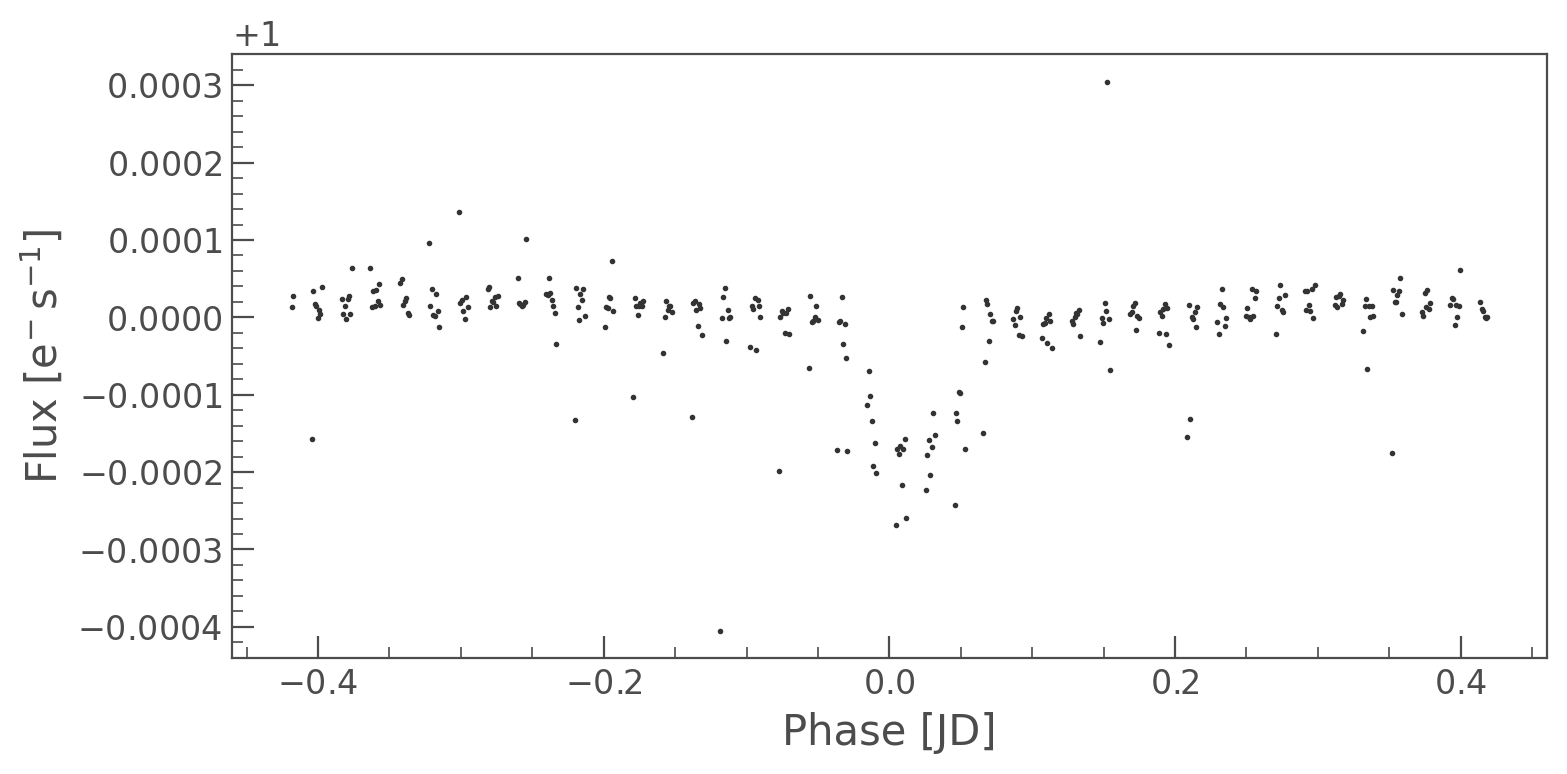

In [29]:
lc.fold(bls.period_at_max_power.value, bls.transit_time_at_max_power.value).bin(0.001).scatter()